<a href="https://colab.research.google.com/github/hamedHT/Artificial-intelligence/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#text preprocessing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving labeled_data.csv to labeled_data (1).csv


In [ ]:
df = pd.read_csv('labeled_data.csv')
print(df)

       Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  
0      !!! RT @m

In [ ]:
df.shape

(24783, 7)

In [ ]:
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [ ]:
combine=df.append(df,ignore_index=True)
combine.shape

<ipython-input-27-d9bcc798247d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine=df.append(df,ignore_index=True)


(49566, 7)

In [ ]:
def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
        return input_text

In [ ]:
combine['tidy_tweet'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")
combine.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,tidy_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! RT : As a woman you shouldn't complain abo...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! RT : boy dats cold...tyga dwn bad for cu...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! RT Dawg!!!! RT @80sbaby4life: You eve...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! RT : @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! RT : The shit you hear about me ...


In [ ]:
combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combine.head(10)

<ipython-input-30-9aae1768bdf7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,tidy_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT As a woman you shouldn t complain abo...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT boy dats cold tyga dwn bad for cu...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT Dawg RT sbaby life You eve...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT viva based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT The shit you hear about me ...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",The shit just blows me c...
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",I can not just sit up and HATE on ano...
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,# cause I m tired of you big bitche...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",None
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...",hobbies include fighting Mariam bitch


In [ ]:
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
combine.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,tidy_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman shouldn complain about cleaning your hou...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,dats cold tyga cuffin place
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Dawg sbaby life ever fuck bitch start confused...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,viva based look like tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear about might true might faker than bi...


In [ ]:
tokenized_tweet = combine['tidy_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0    [woman, shouldn, complain, about, cleaning, yo...
1                    [dats, cold, tyga, cuffin, place]
2    [Dawg, sbaby, life, ever, fuck, bitch, start, ...
3                    [viva, based, look, like, tranny]
4    [shit, hear, about, might, true, might, faker,...
Name: tidy_tweet, dtype: object

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combine['tidy_tweet'] = tokenized_tweet

In [ ]:
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        return hashtags

In [ ]:
# extracting hastags from non racist tweets
ht_regular = hashtag_extract(combine['tidy_tweet'][combine['class']==0])
# extracting hastags from  racist tweets
ht_negative = hashtag_extract(combine['tidy_tweet'][combine['class']==1])
ht_regular = sum(ht_regular,[])
ht_negative = sum(ht_negative,[])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim

In [ ]:
bow_vectorize = CountVectorizer(max_df = 0.90 , min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorize.fit_transform(combine['tidy_tweet'])
bow.shape

(49566, 1000)

In [ ]:
combine = combine.fillna(0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, combine['class'], test_size=0.2, random_state=42)

In [ ]:
print("X_train_shape :", X_train.shape)
print("X_test_shape :", X_test.shape)
print("X_train_shape :", y_train.shape)
print("y_test_shape :", y_test.shape)

X_train_shape : (39652, 1000)
X_test_shape : (9914, 1000)
X_train_shape : (39652,)
y_test_shape : (9914,)


XGBOOST


In [ ]:
import seaborn as sns

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import warnings

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


warnings.filterwarnings("ignore")


In [ ]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [ ]:
# fit model no training data
model = XGBClassifier(n_estimators=10000, objective='binary:logistic', tree_method='hist', eta=1, max_depth=3)
model.fit(X_train, y_train)


In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report( y_pred, y_test))

              precision    recall  f1-score   support

           0       0.49      0.86      0.63       326
           1       0.99      0.88      0.93      8583
           2       0.56      0.93      0.70      1005

    accuracy                           0.89      9914
   macro avg       0.68      0.89      0.75      9914
weighted avg       0.93      0.89      0.90      9914



LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1', 'l2', 'elasticnet'], 'C':[1,2,3,4,5,6,10,20,30,40,50], 'max_iter':[50,100,200,300]}

In [ ]:
classifier_regressor=GridSearchCV(classifier, param_grid=parameter,scoring='accuracy', cv=5)

In [ ]:
classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [50, 100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
print(classifier_regressor.best_params_)

{'C': 10, 'max_iter': 300, 'penalty': 'l2'}


In [ ]:
print(classifier_regressor.best_score_)

0.8496418462963108


In [ ]:
#prediction
y_pred = classifier_regressor.predict(X_test)

In [ ]:
#Accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
score=accuracy_score(y_pred,y_test)
print(score)

0.851220496267904


In [ ]:
print(classification_report( y_pred, y_test))

              precision    recall  f1-score   support

           0       0.22      0.53      0.31       238
           1       0.97      0.86      0.91      8693
           2       0.51      0.86      0.64       983

    accuracy                           0.85      9914
   macro avg       0.57      0.75      0.62      9914
weighted avg       0.91      0.85      0.87      9914



In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
cm=confusion_matrix(y_pred, y_test)

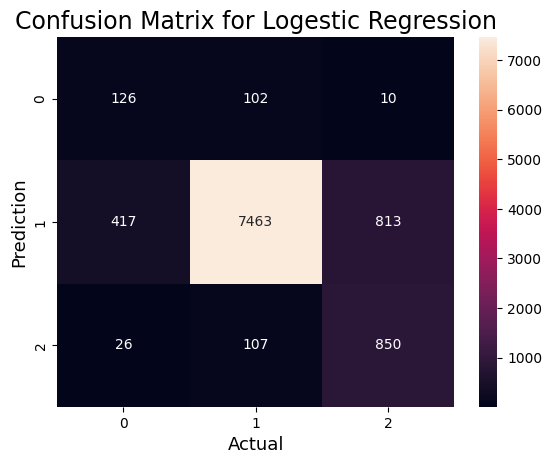

In [ ]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for Logestic Regression',fontsize=17)
plt.show()

In [ ]:
##Naive Baye's

from sklearn.naive_bayes import MultinomialNB
model_naive = MultinomialNB().fit(X_train, y_train)
predictied_naive = model_naive.predict(X_test)

In [ ]:
score=accuracy_score(predictied_naive,y_test)
print(score)

0.8431510994553157


In [ ]:
print(classification_report( predictied_naive, y_test))

              precision    recall  f1-score   support

           0       0.18      0.49      0.27       213
           1       0.97      0.85      0.91      8784
           2       0.47      0.86      0.61       917

    accuracy                           0.84      9914
   macro avg       0.54      0.73      0.59      9914
weighted avg       0.91      0.84      0.87      9914



In [ ]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(predictied_naive, y_test)

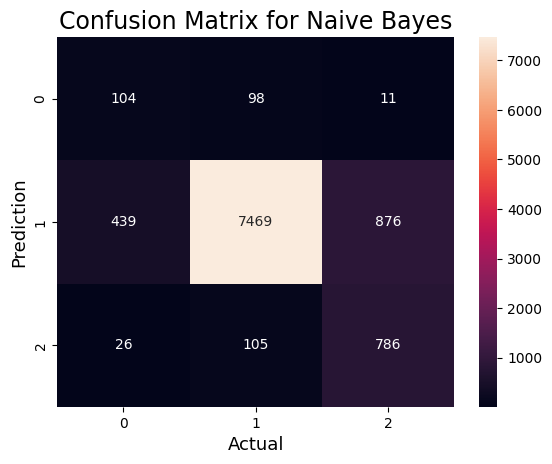

In [ ]:
sns.heatmap(cm1,
            annot=True,
            fmt='g',
            )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for Naive Bayes',fontsize=17)
plt.show()

In [ ]:
##SVM
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 10],
}

# Create an SVM classifier
svm = SVC()

# Perform a grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best Parameters: ", best_params)
print("Best Accuracy: {:.2f}%".format(best_accuracy * 100))

# Evaluate the model on the test set using the best parameters
best_svm = grid_search.best_estimator_
test_accuracy = best_svm.score(X_test, y_test)
print("Test Accuracy with Best Parameters: {:.2f}%".format(test_accuracy * 100))

Best Parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Accuracy: 87.32%
Test Accuracy with Best Parameters: 88.26%


In [ ]:
from sklearn.metrics import accuracy_score,classification_report
y_pred = grid_search.predict(X_test)
print(classification_report( y_pred, y_test))

              precision    recall  f1-score   support

           0       0.46      0.83      0.59       313
           1       0.99      0.88      0.93      8636
           2       0.54      0.94      0.69       965

    accuracy                           0.88      9914
   macro avg       0.66      0.88      0.74      9914
weighted avg       0.93      0.88      0.90      9914



In [ ]:
print(confusion_matrix(y_pred, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_pred, y_test)

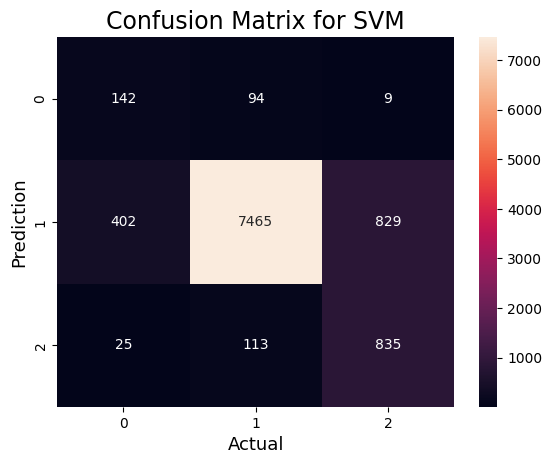

In [ ]:
sns.heatmap(cm2,
            annot=True,
            fmt='g',
            )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for SVM',fontsize=17)
plt.show()

In [ ]:
##Random Forest

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,  random_state=0, bootstrap=True, max_features="auto",verbose=10)
classifier.fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.5s


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100


[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    1.0s


building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100


[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    1.6s


building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.3s


building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    3.2s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    4.1s


building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    5.3s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.5s


building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100


[Parallel(n_jobs=1)]: Done  60 tasks      | elapsed:    7.9s


building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100


[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    9.6s


building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100


[Parallel(n_jobs=1)]: Done  84 tasks      | elapsed:   12.0s


building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100


[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:   13.7s


building tree 99 of 100
building tree 100 of 100


RandomForestClassifier(max_features='auto', random_state=0, verbose=10)

In [ ]:
pred = classifier.predict(X_test)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  60 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  84 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.9s


In [ ]:
score=accuracy_score(pred,y_test)
print(score)

0.890054468428485


In [ ]:
print(classification_report( pred, y_test))

              precision    recall  f1-score   support

           0       0.51      0.89      0.64       325
           1       0.99      0.88      0.93      8583
           2       0.56      0.94      0.71      1006

    accuracy                           0.89      9914
   macro avg       0.69      0.90      0.76      9914
weighted avg       0.93      0.89      0.90      9914



In [ ]:
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(pred, y_test)

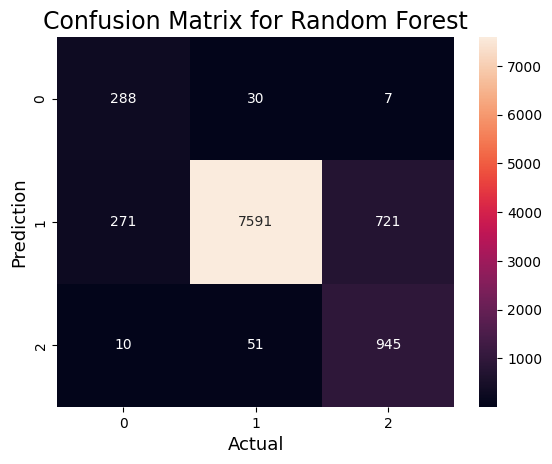

In [ ]:
sns.heatmap(cm3,
            annot=True,
            fmt='g',
            )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for Random Forest',fontsize=17)
plt.show()